# **Black-box Models**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./filtered_df.csv')

In [2]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

# Apply label encoding to the categorical columns
for i in categorical_columns:
    encoded = encoder.fit_transform(df[i])
    df[i]= encoded

bool_columns = df.select_dtypes(include=['boolean']).columns.tolist()

# Apply label encoding to the categorical columns
for i in bool_columns:
    df[i]= df[i].astype(int)



In [3]:

def summary(df):
    #print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Price,float64,0,0.0,0,1883,20687,600.0,765070.0,262037.064726,168702.256427,98000.0,290000.0,182000.0
District,int32,0,0.0,0,23,20687,0.0,22.0,11.731232,6.070677,0.0,0.0,0.0
City,int32,0,0.0,0,265,20687,0.0,264.0,131.504036,73.749825,3.0,198.0,81.0
Town,int32,0,0.0,0,1913,20687,0.0,1912.0,904.601682,548.621205,39.0,400.0,632.0
Type,int32,0,0.0,0,2,20687,0.0,1.0,0.446706,0.497164,0.0,1.0,0.0
EnergyCertificate,int32,0,0.0,0,11,20687,0.0,10.0,5.411514,2.700527,7.0,7.0,5.0
Parking,float64,0,0.0,0,2,20687,0.0,1.0,0.340117,0.473760,0.0,0.0,1.0
ConstructionYear,float64,0,0.0,0,114,20687,1900.0,2024.0,1989.487504,27.428612,1992.0,1992.0,1990.0
TotalArea,float64,0,0.0,0,319,20687,10.0,333.0,116.382607,57.265141,81.0,137.0,61.0
Garage,int32,0,0.0,0,2,20687,0.0,1.0,0.243003,0.428907,0.0,1.0,0.0


## **Black-box Model** : Random Forest Regressor

Mean Squared Error: 7057159248.87
R^2 Score: 0.75


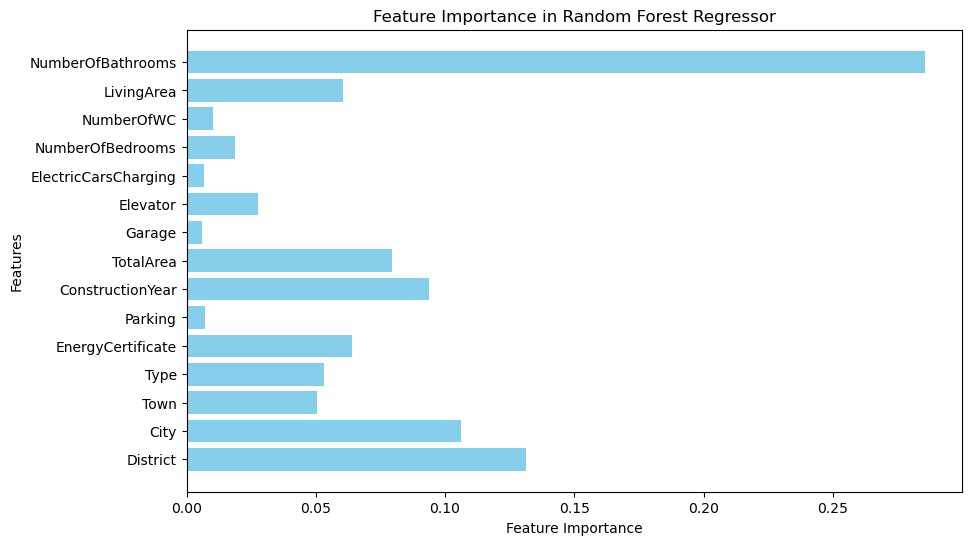

In [4]:
X = df.drop(["Price"],axis=1)
y = df['Price']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature Importance Visualization
importances = rf.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

Task 3.1
Global Surrogates

Mean Squared Error: 9375371233.187109
R^2 Score: 0.5494099955210514


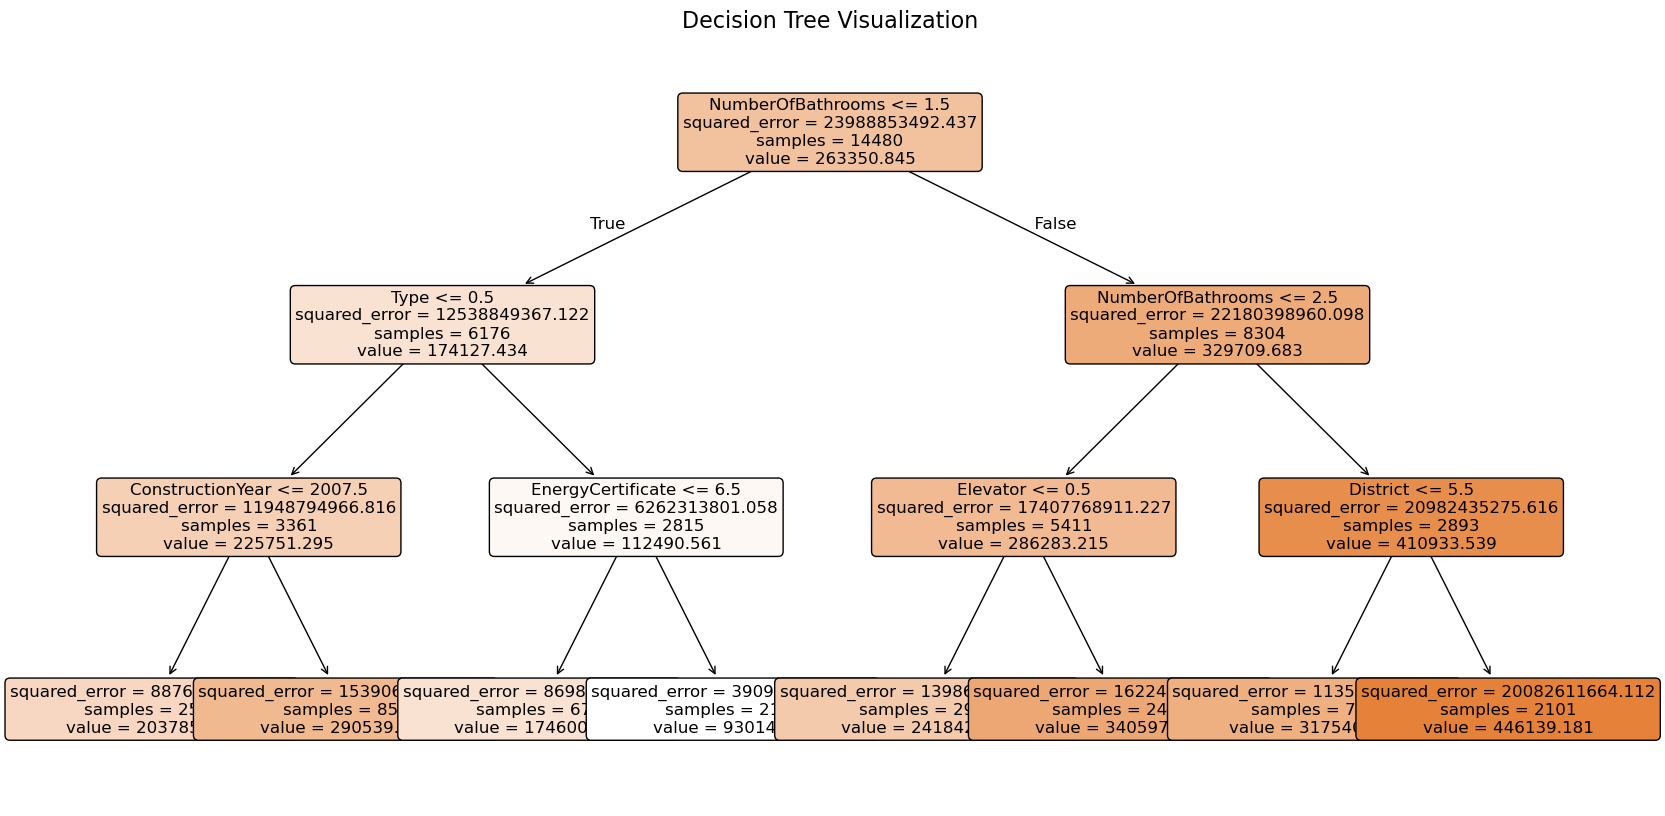

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
y_pre = rf.predict(X)
X_trai, X_tes, y_trai, y_tes = train_test_split(X, y_pre, test_size=0.3, random_state=42)
# Instantiate the Linear Regression model
dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)  # Adjust max_depth as needed

# Fit the model to the training data
dt_regressor.fit(X_trai, y_trai)

# Make predictions
y_pr = dt_regressor.predict(X_tes)

# Evaluate the model
mse = mean_squared_error(y_tes, y_pr)
r2 = r2_score(y_tes, y_pr)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

Task 3.2
Permutation Feature Importance

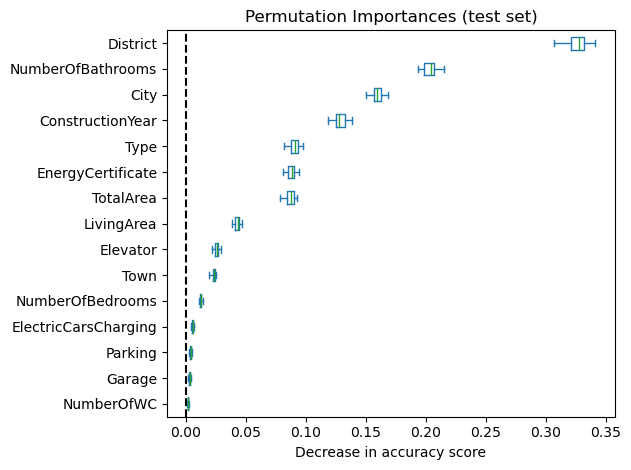

In [6]:
from sklearn.inspection import permutation_importance
import numpy as np
perm_importance = permutation_importance(
    rf, X_test, y_test, n_repeats=30, random_state=42, scoring='r2'
)
sorted_idx = perm_importance.importances_mean.argsort()

importances = pd.DataFrame(
    perm_importance.importances[sorted_idx].T,
    columns=X.columns[sorted_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


Shap

In [5]:
import shap


# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for the test set
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Task 3.3

(array([363., 474., 388., 489., 749., 685., 528., 507., 314., 388., 268.,
        214., 172., 137., 121., 124.,  93.,  50.,  65.,  78.]),
 array([  1000.,  39200.,  77400., 115600., 153800., 192000., 230200.,
        268400., 306600., 344800., 383000., 421200., 459400., 497600.,
        535800., 574000., 612200., 650400., 688600., 726800., 765000.]),
 <BarContainer object of 20 artists>)

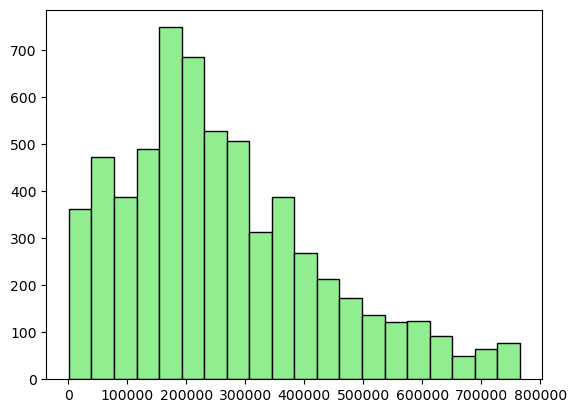

In [26]:
import dice_ml
from dice_ml.utils import helpers # helper functions
X_test2 = X_test.copy()
X_test2['Price'] = y_test
m= dice_ml.Model(model=rf, backend="sklearn", model_type='regressor')
d= dice_ml.Data(dataframe=X_test2, continuous_features = ['TotalArea', 'LivingArea'], outcome_name='Price')
exp = dice_ml.Dice(d,m)

plt.hist(y_test, color='lightgreen', ec='black', bins=20)

In [22]:
query_instance = X_test2.drop(columns="Price")[0:1]
print(query_instance)


dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_range=[0.0, 1000000000000.0])
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

      District  City  Town  Type  EnergyCertificate  Parking  \
3769         5    90  1660     1                  9      0.0   

      ConstructionYear  TotalArea  Garage  Elevator  ElectricCarsCharging  \
3769            1992.0       37.0       0         0                     0   

      NumberOfBedrooms  NumberOfWC  LivingArea  NumberOfBathrooms  
3769               1.0         0.0        37.0                1.0  


100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

Query instance (original outcome : 75753.0)


,District,City,Town,Type,EnergyCertificate,Parking,ConstructionYear,TotalArea,Garage,Elevator,ElectricCarsCharging,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms,Price
0,5,90,1660,1,9,0.0,1992.0,37.0,0,0,0,1.0,0.0,37.0,1.0,75753.0



Diverse Counterfactual set (new outcome: [0.0, 1000000000000.0])


,District,City,Town,Type,EnergyCertificate,Parking,ConstructionYear,TotalArea,Garage,Elevator,ElectricCarsCharging,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms,Price
0,5,110,1660,1,7,0.0,1992.0,37.0,0,0,0,1.0,0.0,37.0,1.0,97073.5
1,5,90,1660,1,9,0.0,1992.0,37.0,0,0,0,1.0,0.0,28.1,1.0,90825.0
2,5,90,1660,1,9,0.0,1992.0,254.4,0,1,0,1.0,0.0,37.0,1.0,146162.0
3,5,90,1660,1,9,0.0,1992.0,120.9,0,0,0,1.0,0.0,37.0,1.0,80906.5


2 black box model


In [13]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200,300],        # Number of trees in the forest
    'max_depth': [5, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimization metric
    n_jobs=-1,  # Use all available cores
    verbose=2  # Output progress
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Metrics for the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Mean Squared Error:", mse)
print("Best Model R2 Score:", r2)

## **Black-box Model** : Neural Network Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Improved Feedforward Neural Network Model
model = Sequential([
    # First dense layer with 128 units and ReLU activation
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Second dense layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Third dense layer with 32 units and ReLU activation
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Fully connected layer to combine features
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    # Output layer: predicting house price (regression task)
    Dense(1)  # No activation function here for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")